In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import cluster # Auxiliar
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [2]:
numericalDF = pd.read_csv('numericalData.csv')
columnas = ['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget','class']
del numericalDF['Unnamed: 0']
for i in columnas:
    numericalDF.loc[numericalDF[i] == 0, i] = numericalDF[i].mean()
df = numericalDF
df_pure = numericalDF[list(['directores','criticas','duracion','genero','actores1','actores2','actores3','rostros',
            'scores','gross','budget'])]
df_class = numericalDF[list(['class'])]
numericalDF.head()

,directores,criticas,duracion,genero,actores1,actores2,actores3,rostros,scores,gross,budget,class
0,0.024778,0.003295,0.011543,0.007769,0.034020,0.029215,0.027567,0.007924,0.014223,0.000016,7.773335e-08,1.0
1,0.031655,0.001073,0.012825,0.011654,0.015347,0.000761,0.027559,0.028946,0.013576,0.000002,2.522814e-03,1.0
2,0.031642,0.000996,0.009747,0.018128,0.034004,0.029206,0.027551,0.007924,0.013576,0.007426,9.893336e-08,1.0
3,0.001505,0.003295,0.005515,0.022013,0.033988,0.029196,0.027543,0.005789,0.016162,0.007426,2.522814e-03,2.0
4,0.031629,0.000077,0.011158,0.011654,0.024448,0.029186,0.006778,0.011579,0.016593,0.007426,2.522814e-03,2.0


In [3]:
cut = df.shape[0] // 3 * 2

complete_set = df_pure.values
complete_targets = df_class.values.ravel()
train_set = df_pure.head(cut).values
train_targets = df_class.head(cut).values.ravel()
test_set = df_pure.tail(df.shape[0]-cut).values
test_targets = df_class.tail(df.shape[0]-cut).values.ravel()

clf = GaussianNB()
clf.fit(complete_set, complete_targets)
class_complete = clf.predict(complete_set)
fails_complete = np.sum(complete_targets  != class_complete)
print("Puntos mal clasificados en el conjunto completo: {} de {} ({}%)\n"
      .format(fails_complete, len(complete_set), 100*fails_complete/len(complete_set)))

clf.fit(train_set, train_targets)
class_predict_train = clf.predict(train_set)
fails_train = np.sum(train_targets  != class_predict_train)
print("Puntos mal clasificados en el conjunto de entrenamiento: {} de {} ({}%)\n"
      .format(fails_train, len(train_set), 100*fails_train/len(train_set)))

class_predict_test = clf.predict(test_set)
fails_test = np.sum(test_targets  != class_predict_test)
print("Puntos mal clasificados en el conjunto de prueba: {} de {} ({}%)\n"
      .format(fails_test, len(test_set), 100*fails_test/len(test_set)))

Puntos mal clasificados en el conjunto completo: 469 de 5036 (9.31294678316124%)

Puntos mal clasificados en el conjunto de entrenamiento: 290 de 3356 (8.64123957091776%)

Puntos mal clasificados en el conjunto de prueba: 282 de 1680 (16.785714285714285%)



Primeros 5 vectores:
 [[ 2 14  8  7  5  5 13  9  8  5 10]
 [ 1  7 11  5  3  9  2 11  5 11 10]
 [ 0 12  8  1  6  3  7  1  9  6  4]
 [ 1  5  4  9 11  0 10  5  8 11  6]
 [ 5 11  3 14  6  3  6  6  1 10 10]]


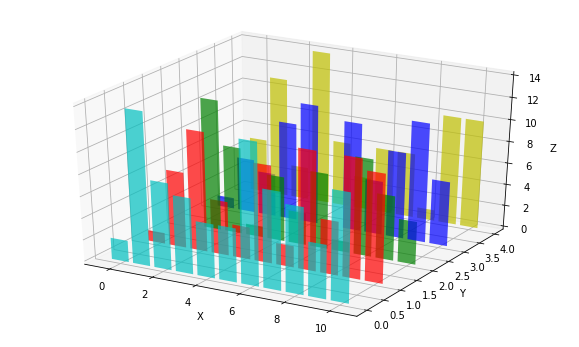

Resultados del entrenamiento (muestras por clase)
[ 2499.  2537.]

Vectores de prueba
[[ 7  2  7  5 12  3  7 10  8 11 14]
 [10 10  0  3  9 12 10  8 14  6  7]
 [13  6  6 13  8  9  2 14  8  8 10]
 [ 3  8  6 12  4  9  1  6 13 10 11]
 [ 5  4  1 14  2 13  7 14 14 10  6]]

Clase por vector de prueba
[0 0 1 1 1]

Tabla de probabilidades
[[  9.12697306e-01   8.73026942e-02]
 [  9.92044235e-01   7.95576520e-03]
 [  2.60916770e-03   9.97390832e-01]
 [  1.98757371e-03   9.98012426e-01]
 [  3.66955335e-04   9.99633045e-01]]

Clasificación esperada de los 5 primeros datos de etrenamiento
[1 0 0 1 1]

Tabla de probabilidades para datos de entrenamiento
[[  3.44195914e-01   6.55804086e-01]
 [  8.65350688e-01   1.34649312e-01]
 [  9.86560602e-01   1.34393977e-02]
 [  1.08531813e-02   9.89146819e-01]
 [  2.38499047e-05   9.99976150e-01]]


In [4]:
num_features = 11
num_vectors = len(numericalDF)
num_clases = 2
data_array = np.random.randint(15, size=(num_vectors, num_features))
print("Primeros 5 vectores:\n", data_array[:5])

x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
colors = ['c', 'r', 'g', 'b', 'y']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(4, -1, -1): 
    cs = colors[i % len(colors)] * num_features
    ax.bar(x_data[i], data_array[i], zs=y_data[i], zdir='y', color=cs, alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#
k_means = cluster.KMeans(n_clusters=num_clases, init='random')
k_means.fit(data_array) 
y = k_means.fit_predict(data_array)
#

clfM = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)
clfM.fit(data_array, y)
print("Resultados del entrenamiento (muestras por clase)\n{}\n".format(clfM.class_count_))

test_data_array = np.random.randint(15, size=(5, num_features))
print("Vectores de prueba\n{}\n\nClase por vector de prueba\n{}\n"
      .format(test_data_array, clfM.predict(test_data_array)))
print("Tabla de probabilidades\n{}\n".format(clfM.predict_proba(test_data_array)))

print("Clasificación esperada de los 5 primeros datos de etrenamiento\n{}\n"
      .format(y[0:5]))
print("Tabla de probabilidades para datos de entrenamiento\n{}"
      .format(clfM.predict_proba(data_array[0:5])))